In [1]:
# import numpy as np
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

print ('...')

...


(1080, 1920, 3)


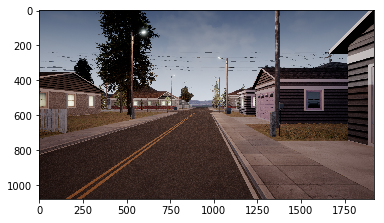

In [2]:
testImageRoot = "./RightHookTestImage/rh3.png"

rawImg = cv2.imread(testImageRoot)
print (rawImg.shape)
rawImg = cv2.cvtColor(rawImg,cv2.COLOR_BGR2RGB)
plt.imshow(rawImg)
plt.show()

In [3]:
def warpImage(img):
#(1) use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
#(2) use cv2.warpPerspective to generate warped image in bird view, 
    ## TODO    
    h,w = img.shape[:2]
    x1, y1 = int(img.shape[1]*0.25), 1000
    x2, y2 = int(img.shape[1]*0.44), 650
    x3, y3 = int(img.shape[1]*0.75), y1
    x4, y4 = int(img.shape[1]*0.56), y2
#     src = np.float32([(575,464),
#                   (707,464), 
#                   (270,682), 
#                   (1030,682)])
    dst = np.float32([(600,0),
                  (w-600,0),
                  (600,h),
                  (w-600,h)])   
    src = np.float32([(x2,y2),(x4,y4),(x1,y1),(x3,y3)])

    
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # use cv2.warpPerspective to transform to bird view
    warpedImg = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    ####
    return warpedImg, M, Minv

(1080, 1920, 3)


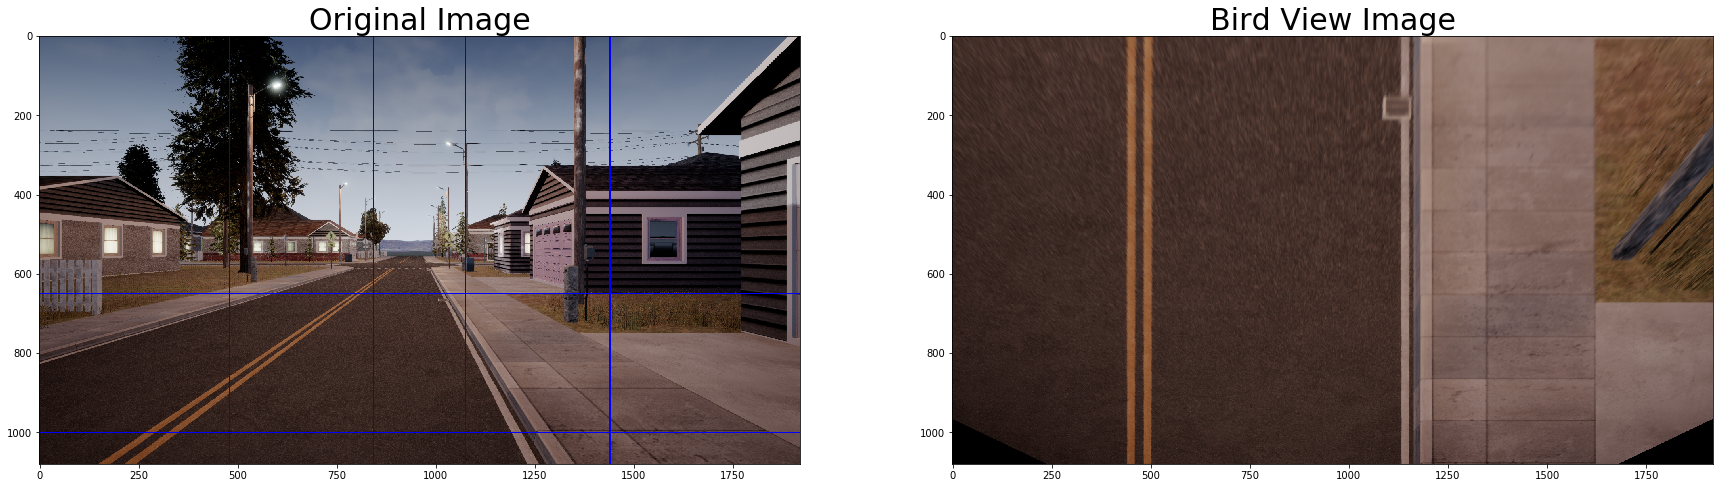

In [4]:
#test warpImage
rawImage = cv2.imread(testImageRoot)
print (rawImage.shape)
warpedImage, M, Minv = warpImage(rawImage)

#4 reference points
x1, y1 = int(rawImage.shape[1]*0.25), 1000
x2, y2 = int(rawImage.shape[1]*0.44), 650
x3, y3 = int(rawImage.shape[1]*0.75), y1
x4, y4 = int(rawImage.shape[1]*0.56), y2

# Visualize perspective tranform
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,30))
#plt.figure(1)

#remove this for student!
cv2.line(rawImage, (0, y2), (rawImage.shape[1], y2), (255, 0, 0), 2, 1)
cv2.line(rawImage, (0, y1), (rawImage.shape[1], y1), (255, 0, 0), 2, 1)
cv2.line(rawImage, (x1, 0), (x1, rawImage.shape[0]), (255, 0, 0), 2, 1)
cv2.line(rawImage, (x2, 0), (x2, rawImage.shape[0]), (255, 0, 0), 2, 1)
cv2.line(rawImage, (x3, 0), (x3, rawImage.shape[0]), (255, 0, 0), 2, 1)
cv2.line(rawImage, (x4, 0), (x4, rawImage.shape[0]), (255, 0, 0), 2, 1)

plot1 = cv2.cvtColor(rawImage,cv2.COLOR_BGR2RGB)
ax1.imshow(plot1)
ax1.set_title('Original Image', fontsize=30)

plot2 = cv2.cvtColor(warpedImage,cv2.COLOR_BGR2RGB)
ax2.imshow(plot2)
ax2.set_title('Bird View Image', fontsize=30)
plt.show()

In [5]:
def laplacian(img, thresh_min=0, thresh_max=255):
    #1. convert the image to gray scale
    #2. Gaussian blur the image
    #3. implement laplacian edge detetion using openCV
    #4. using numpy to scale the result to uint8(0-255)
    #5. using the threshold to create a binary image and return it
    
    ## TODO
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_good = cv2.GaussianBlur(gray,(3,3),0)
    laplacian = cv2.Laplacian(img_good,cv2.CV_64F)
    scaled_lap = np.uint8(255*laplacian/np.max(laplacian))
    sxbinary = np.zeros_like(scaled_lap)
    sxbinary[(scaled_lap >= thresh_min) & (scaled_lap <= thresh_max)] = 1
    
    #(22, 131)
    ####
    return sxbinary
print('...')

...


In [6]:
def sobel(img, thresh_min=40, thresh_max=200):
    #1. convert the image to gray scale
    #2. Gaussian blur the image
    #3. Use Sobel to find derievatives for both X and Y Axis
    #4. Use addweight to combine the results
    #5. Convert each pixel to unint8, then apply threshold to get binary image
    ## TODO
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img_good = cv2.GaussianBlur(gray,(3,3),0)
    sobelX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobelY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    combined = cv2.addWeighted(sobelX, 0.7, sobelY, 0.3, 0)
    scaled_lap = np.uint8(255*combined/np.max(combined))
    binary_output = np.zeros_like(scaled_lap)
    binary_output[(scaled_lap >= thresh_min) & (scaled_lap <= thresh_max)] = 1
    
    #### (40, 200)
    return binary_output   
print ('...')

...


In [7]:
def fineTuning(thresh_min1,thresh_max1,thresh_min2,thresh_max2,thresh_min3,thresh_max3):
    rawImage = cv2.imread("./RightHookTestImage/rh3.png")
    warpedImage, M, Minv = warpImage(rawImage)
    #To test different function you write, change the function name 
    #newImg = laplacian(warpedImage, thresh_min1, thresh_max1)
    newImg = sobel(warpedImage, thresh_min1, thresh_max1)
    f = plt.figure(figsize= (20,15))
    f.add_subplot(1, 2, 1)
    plot1 = cv2.cvtColor(warpedImage,cv2.COLOR_BGR2RGB)
    plt.imshow(plot1)
    f.add_subplot(1, 2, 2)
    plt.imshow(newImg, cmap='gray')
    plt.show()
    
interact(fineTuning, thresh_min1 = (0, 255, 1), thresh_max1 = (0,255, 1), thresh_min2 = (0,255, 1), thresh_max2 = (0, 255, 1), thresh_min3 = (0, 255, 1), thresh_max3 = (0, 255, 1))

A Jupyter Widget

<function __main__.fineTuning>

In [8]:
def colorThres(img, thresh_min1=140,thresh_max1=180,thresh_min2=30,thresh_max2=150,thresh_min3=30,thresh_max3=100):
    #when tuning, uncomment the min and max inputs
    #1. Gaussian blur the image (cv2.GaussianBlur())
    #2. Choose the color space that you like, convert image to it (cv2.cvtColor())
    #3. Apply threshold on the image to create binary image output
    #4. Combine results from different color spaces 
    
    ##TODO
    img = cv2.GaussianBlur(img,(3,3),0)
    #RGB: white (100,100,200)-(255,255,255) yellow(225, 180, 0)-(255,255,170) 
    #HLS: (20, 120, 80)-(45, 200, 255)
    #hlsLowBound1 = (20, 80, 120)
    #hlsHighBound1 = (103, 200, 255)
#     hlsLowBound2 = (0, 220, 190)
#     hlsHighBound2 = (255, 255, 225)
#     hlsLowBound1 = (thresh_min1, thresh_min2, thresh_min3)
#     hlsHighBound1 = (thresh_max1, thresh_max2, thresh_max3)    
#     hlsImg = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#     hlsMask1 = cv2.inRange(hlsImg, hlsLowBound1, hlsHighBound1)
#     hlsOutput1 = cv2.bitwise_and(hlsImg, hlsImg, mask = hlsMask1).astype(np.uint8)
#     hlsOutput1 = cv2.cvtColor(hlsOutput1, cv2.COLOR_HLS2RGB)
#     hlsOutput1 = cv2.cvtColor(hlsOutput1, cv2.COLOR_RGB2GRAY)
#     hlsBin1 = np.zeros_like(hlsOutput1)
#     hlsBin1[(hlsOutput1 >= 20) & (hlsOutput1 <= 255)]=1
    
#     hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#     hls_l = hls[:,:,1]
#     hls_l = hls_l*(255/np.max(hls_l))
#     hlsBin2 = np.zeros_like(hls_l)
#     hlsBin2[(hls_l > thresh_min2) & (hls_l <= thresh_max2)] = 1

#     labLowBound1 = (thresh_min1,thresh_min2,thresh_min3)#(0,0,190)
#     labHighBound1 = (thresh_max1,thresh_max2,thresh_max3)#(255, 255, 255)
#     labImg = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
#     labMask1 = cv2.inRange(labImg, labLowBound1, labHighBound1)
#     labOutput1 = cv2.bitwise_and(labImg, labImg, mask = labMask1).astype(np.uint8)
#     labOutput1 = cv2.cvtColor(labOutput1, cv2.COLOR_LAB2RGB)
#     labOutput1 = cv2.cvtColor(labOutput1, cv2.COLOR_RGB2GRAY)
#     labBin1 = np.zeros_like(labOutput1)
#     h,w = labOutput1.shape[:2]
#     labBin1[(labOutput1 >= 0)]=1
    
    rgbLowBound1 = (thresh_min1,thresh_min2,thresh_min3)#(100,140,183) (110,130,90)
    rgbHighBound1 = (thresh_max1,thresh_max2,thresh_max3)#(160,192,255) (180,160,130)
    rgbMask1 = cv2.inRange(img, rgbLowBound1, rgbHighBound1)
    rgbOutput1 = cv2.bitwise_and(img, img, mask = rgbMask1).astype(np.uint8)
    rgbOutput1 = cv2.cvtColor(rgbOutput1, cv2.COLOR_RGB2GRAY)
    rgbBin1 = np.zeros_like(rgbOutput1)
    rgbBin1[(rgbOutput1 >= 20) & (rgbOutput1 <= 255)]=1
    
    
    rgbLowBound2 = (149,110,80)#(160, 160, 160)#(thresh_min1,thresh_min2,thresh_min3)# # ##white 
    rgbHighBound2 = (220,255,255)#(230, 255,255)#(thresh_max1,thresh_max2,thresh_max3)##
    rgbMask2 = cv2.inRange(img, rgbLowBound2, rgbHighBound2)
    rgbOutput2 = cv2.bitwise_and(img, img, mask = rgbMask2).astype(np.uint8)
    rgbOutput2 = cv2.cvtColor(rgbOutput2, cv2.COLOR_RGB2GRAY)
    rgbBin2 = np.zeros_like(rgbOutput2)
    rgbBin2[(rgbOutput2 >= 20) & (rgbOutput2 <= 255)]=1

    ####
    binary_output = np.zeros_like(rgbMask1)
    #choose whatever color space you want 
    #binary_output[(rgbBin1==1)] = 1
    binary_output[(rgbBin1==1)|(rgbBin2==1)] = 1
    #binary_output[(labBin2==1)|(hlsBin2==1)] = 1
    return binary_output

In [9]:
def fineTuning(thresh_min1,thresh_max1,thresh_min2,thresh_max2,thresh_min3,thresh_max3):
    rawImage = cv2.imread(testImageRoot)
    rawImage = cv2.cvtColor(rawImage,cv2.COLOR_BGR2RGB)
    warpedImage, M, Minv = warpImage(rawImage)
    newImg = colorThres(warpedImage,thresh_min1,thresh_max1,thresh_min2,thresh_max2,thresh_min3,thresh_max3)
    f = plt.figure(figsize= (20,15))
    f.add_subplot(1, 2, 1)
    
    plt.imshow(warpedImage)
    f.add_subplot(1, 2, 2)
    plt.imshow(newImg, cmap='gray')
    plt.show()
    
interact(fineTuning, thresh_min1 = (0, 255, 1), thresh_max1 = (0,255, 1), thresh_min2 = (0,255, 1), thresh_max2 = (0, 255, 1), thresh_min3 = (0, 255, 1), thresh_max3 = (0, 255, 1))

A Jupyter Widget

<function __main__.fineTuning>

In [10]:
def combinedEdgeDetection(img):
    ##TODO
#     LapOutput = laplacian(img, 22, 131)
    SobelOutput = sobel(img, 27, 90)
    ColorOutput = colorThres(img)
    
    #####
    binaryImage = np.zeros_like(ColorOutput)
    #here you can use as many methods as you want. 
    binaryImage[(ColorOutput==1)|(SobelOutput==1)] = 1
    return binaryImage

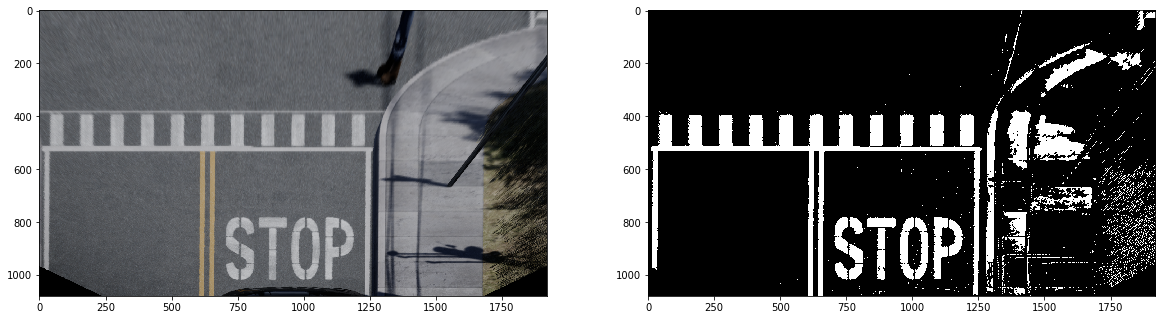

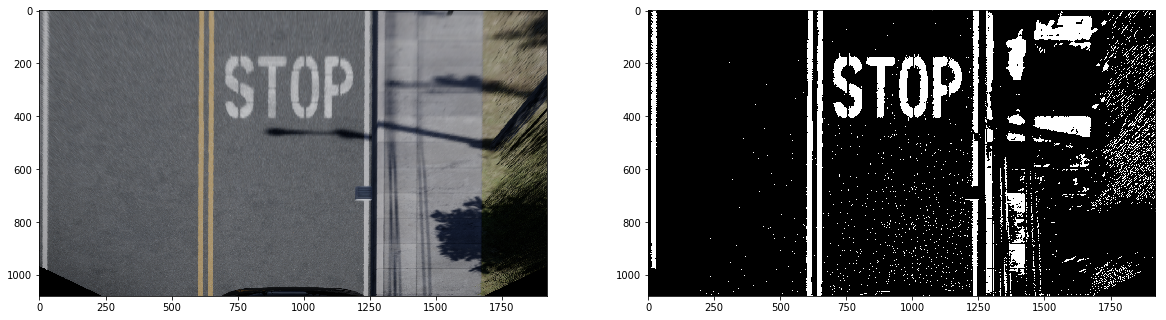

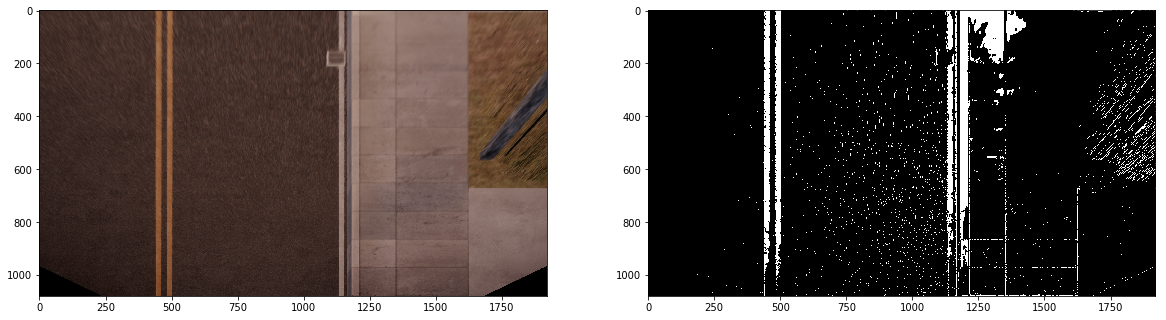

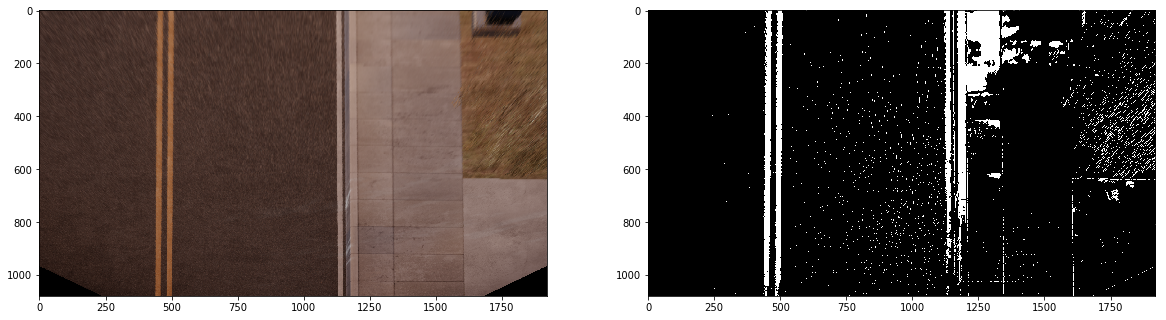

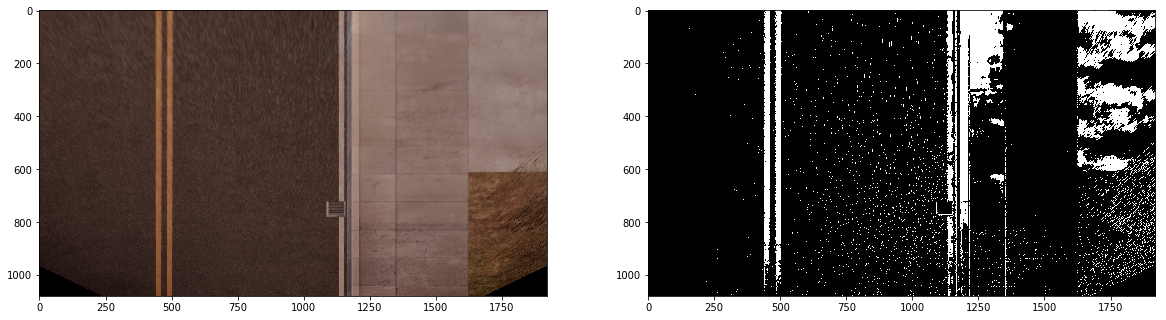

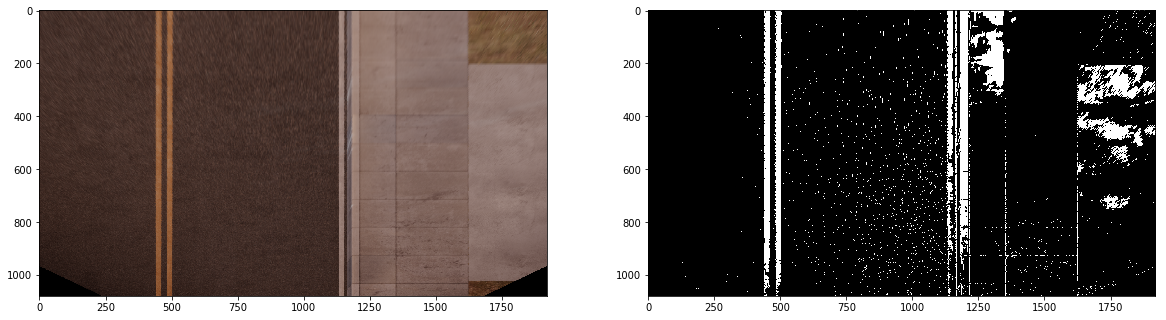

In [11]:
images = glob.glob("./RightHookTestImage/rh*.png")
for frame in images:
    img = cv2.imread(frame)
    #undistortedImg = cv2.undistort(img, mtx, dist, None, mtx)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    warpedImg, M, Minv = warpImage(img)
    edgeDetectedImg = combinedEdgeDetection(warpedImg)
    
    f = plt.figure(figsize= (20,15))
    f.add_subplot(1, 2, 1)
    plt.imshow(warpedImg)
    f.add_subplot(1, 2, 2)
    plt.imshow(edgeDetectedImg,cmap='gray')
    plt.show()

In [12]:
# window settings, can be changed if you want. 
window_width = 30 
window_height = rawImg.shape[0] / 10.0 # Break image into 9 vertical layers since image height is 720
margin = 80 # How much to slide left and right for searching
window = np.ones(window_width) # Create our window template that we will use for convolutions
convThres = 100 # filtered out back ground noise

#Parameters for finding the start points 
verticle_ratio = 1.0/2  
horizontal_ratio = 0.15

def findConvCenter(image):
    ## TODO
    image = np.uint8(255*image/np.max(image))
    #print (image.shape)
    #windowCentroids = [] #Output array that store the (left,right) window centroid positions per level
    leftCentroids = []
    rightCentroids = []

    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    leftSum = np.sum(image[int(image.shape[0]*verticle_ratio):,:int(image.shape[1]/2)], axis=0)
    leftConv = np.convolve(window,leftSum)
    #print (leftSum.shape)
    leftCenterX = np.argmax(leftConv)-window_width/2
    leftCenterY = int(window_height/2.0)
    
    rightSum = np.sum(image[int(image.shape[0]*verticle_ratio):,int(image.shape[1]/2):], axis=0)
    rightConv = np.convolve(window, rightSum)
    rightCenterX = np.argmax(rightConv)-window_width/2+int(image.shape[1]/2)
    rightCenterY = int(window_height/2.0)
                       
    # Add what we found for the first layer
    leftCentroids.append((leftCenterX, leftCenterY))
    rightCentroids.append((rightCenterX, rightCenterY))
    #windowCentroids.append(((leftCenterX, leftCenterY),(rightCenterX, rightCenterY)))
    #print (windowCentroids)
    #Count how many empty layers for left and right line
    leftEmptyCount, rightEmptyCount = 0, 0
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(image.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(image[int(image.shape[0]-(level+1)*window_height):int(image.shape[0]-level*window_height),:], axis=0)
        
        #High pass filter 
        convSig = np.convolve(window, image_layer)
        convIdx = convSig < convThres
        convSig[convIdx] = 0
        
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        if (leftEmptyCount):
            leftMinIdx = int(max(leftCenterX+offset-margin,0))
            leftMaxIdx = int(min(leftCenterX+offset+margin*leftEmptyCount,image.shape[1]))
        else:
            leftMinIdx = int(max(leftCenterX+offset-margin,0))
            leftMaxIdx = int(min(leftCenterX+offset+margin,image.shape[1]))
         
        if (np.any(convSig[leftMinIdx:leftMaxIdx])):
            leftCenterX = np.argmax(convSig[leftMinIdx:leftMaxIdx])+leftMinIdx-offset
            leftCenterY = level * window_height + int(window_height/2.0)
            leftEmptyCount = 0
            leftCentroids.append((leftCenterX, leftCenterY))
        else:
            leftEmptyCount += 1
            
        # Find the best right centroid by using past right center as a reference
        #if last layer not found, extend margin and reuse old refrence
        if (rightEmptyCount):
            rightMinIdx = int(max(rightCenterX+offset-margin,0))
            rightMaxIdx = int(min(rightCenterX+offset+margin*rightEmptyCount,image.shape[1]))
        else:
            rightMinIdx = int(max(rightCenterX+offset-margin,0))
            rightMaxIdx = int(min(rightCenterX+offset+margin,image.shape[1]))
            
        if (np.any(convSig[rightMinIdx:rightMaxIdx])):
            rightCenterX = np.argmax(convSig[rightMinIdx:rightMaxIdx])+rightMinIdx-offset
            rightCenterY = level * window_height + int(window_height/2.0)
            rightEmptyCount = 0
            rightCentroids.append((rightCenterX, rightCenterY))
        else:
            rightEmptyCount += 1
        # Add what we found for that layer
        #windowCentroids.append(((leftCenterX,leftCenterY),(rightCenterX, rightCenterY)))

    ####
    #return a list of tuples (left_line_center, right_line_center)
    return leftCentroids, rightCentroids

print ('...')

...


In [13]:
def window_mask(width, height, img_ref, centerX, centerY):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-centerY-height/2):int(img_ref.shape[0]-centerY+height/2),max(0,int(centerX-width/2)):min(int(centerX+width/2),img_ref.shape[1])] = 1
    return output

def plotWindows(warped):
    leftCentroids, rightCentroids= findConvCenter(warped)
    
    # Points used to draw all the left and right windows
    r_points = np.zeros_like(warped)
    l_points = np.zeros_like(warped)    
    
    if len(leftCentroids) > 0 and len(rightCentroids) > 0:
        if len(leftCentroids) > 0:
            # Go through each level and draw the windows 
            for level in range(0,len(leftCentroids)):
                # Window_mask is a function to draw window areas
                l_mask = window_mask(window_width,window_height,warped,leftCentroids[level][0],leftCentroids[level][1])
                # Add graphic points from window mask here to total pixels found 
                l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255

        if len(rightCentroids) > 0:
            # Go through each level and draw the windows 
            for level in range(0,len(rightCentroids)):
                # Window_mask is a function to draw window areas
                r_mask = window_mask(window_width,window_height,warped,rightCentroids[level][0],rightCentroids[level][1])
                # Add graphic points from window mask here to total pixels found 
                r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

        # Draw the results
        template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
        zero_channel = np.zeros_like(template) # create a zero color channel
        template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
        warpage= np.dstack((warped, warped, warped))*255 # making the original road pixels 3 color channels
        output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
    #If no window centers found, just display orginal road image
    else:
        output = np.array(cv2.merge((warped,warped,warped)),np.uint8)
    return output

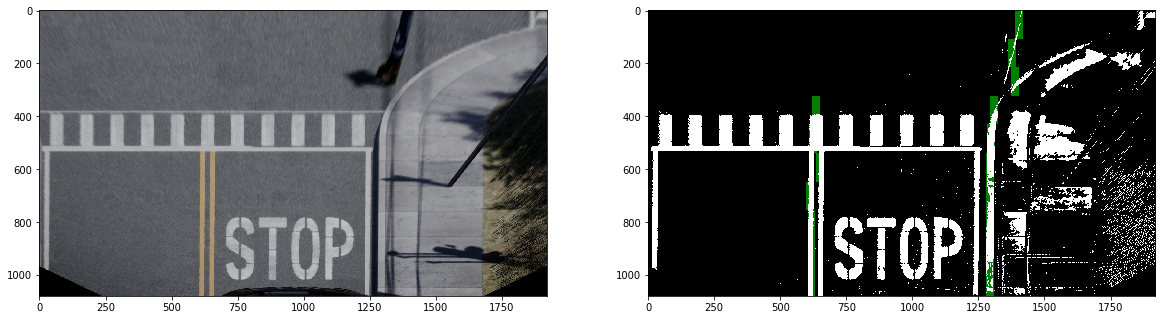

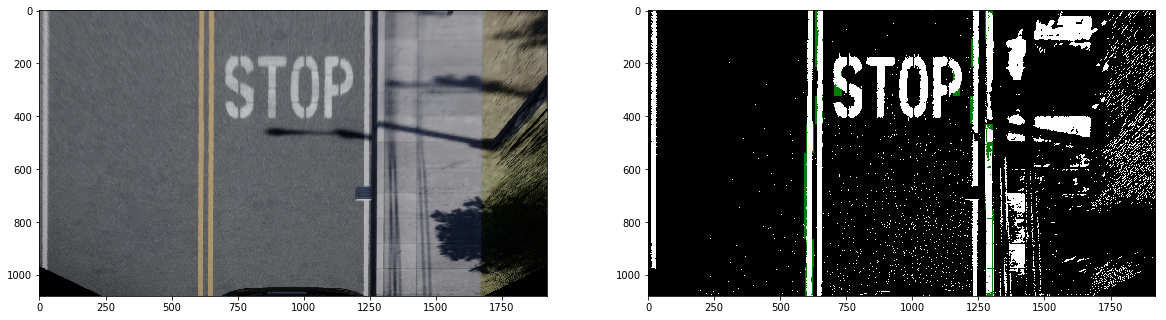

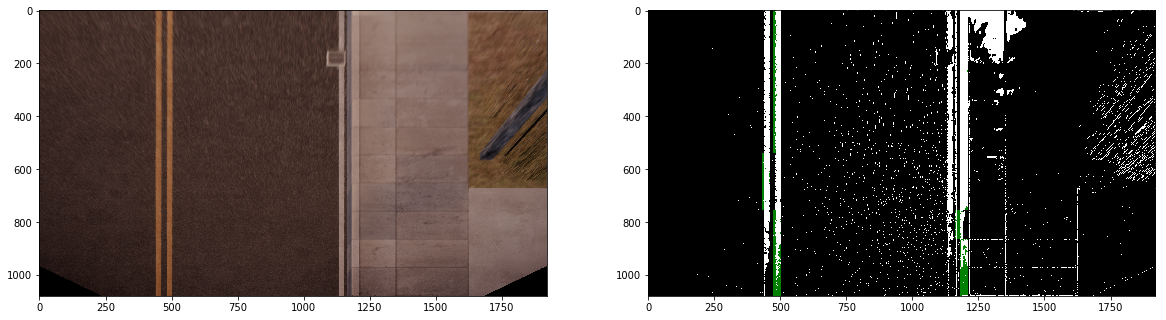

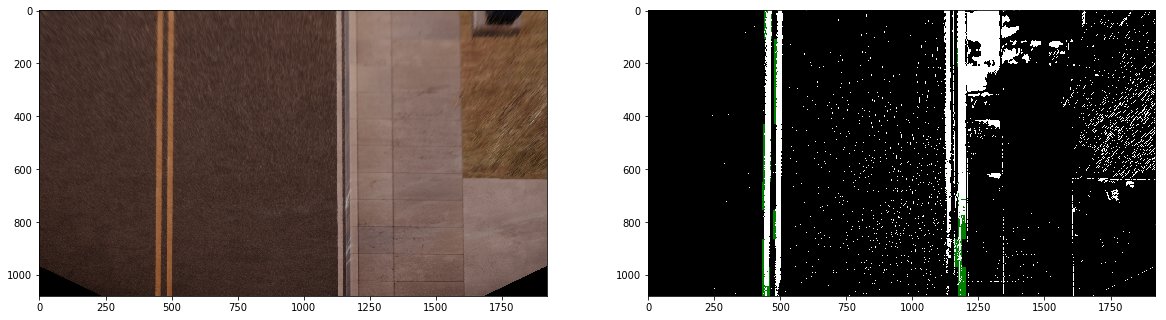

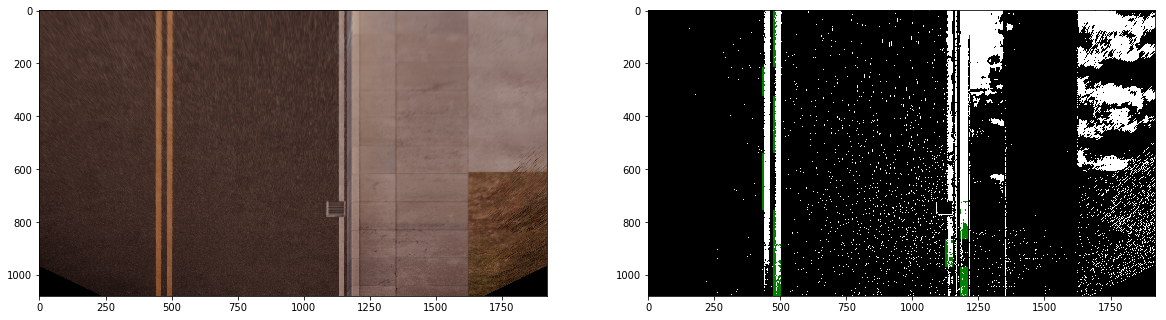

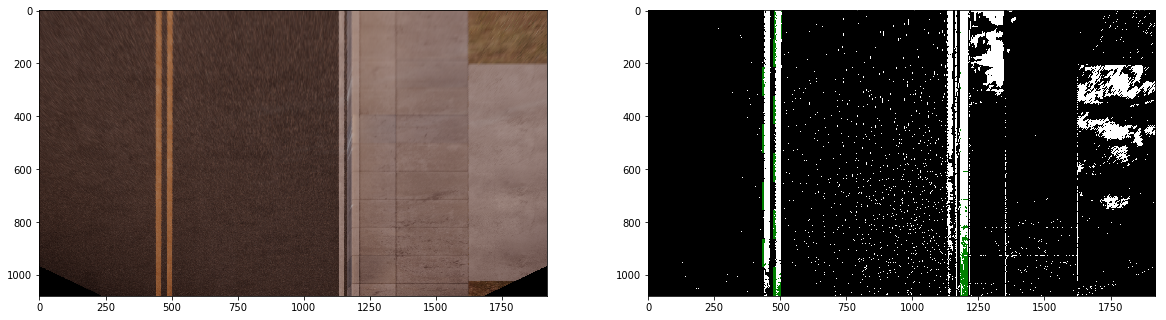

In [14]:
images = glob.glob("./RightHookTestImage/rh*.png")#("test_images/test*.jpg")
for frame in images:
    img = cv2.imread(frame)
    #undistortedImg = cv2.undistort(img, mtx, dist, None, mtx)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    warpedImg, M, Minv = warpImage(img)
    edgeDetectedImg = combinedEdgeDetection(warpedImg)
    plotedLinesImg = plotWindows(edgeDetectedImg)
    
    f = plt.figure(figsize= (20,15))
    f.add_subplot(1, 2, 1)

    plt.imshow(warpedImg)
    f.add_subplot(1, 2, 2)
    plt.imshow(plotedLinesImg)
plt.show()

In [15]:
def drawPoly(originImg, warpImg, leftCentroids, rightCentroids, Minv):
    ##TODO   ##Probably don't ask student to write this part, it is too tediou
    #Generate polynomial functions
    leftX = []
    leftY = []
    rightX = []
    rightY = []
    
    for cur in leftCentroids:
        leftX.append(cur[0])
        leftY.append(cur[1])
        
    for cur in rightCentroids:
        rightX.append(cur[0])
        rightY.append(cur[1])
        
    leftFit = np.polyfit(np.array(leftY), np.array(leftX),2)
    rightFit = np.polyfit(np.array(rightY), np.array(rightX),2)
    
    # Generate y values for plotting
    plotY = np.linspace(0, warpImg.shape[0]-1, warpImg.shape[0])
    # Generate X values for polynomial line 
    leftPlotX = leftFit[0]*plotY**2 + leftFit[1]*plotY + leftFit[2]
    rightPlotX = rightFit[0]*plotY**2 + rightFit[1]*plotY + rightFit[2]
    
    #filter out the out of boundary points
    for i in range(leftPlotX.shape[0]):
        if leftPlotX[i] < 0: 
            leftPlotX[i] = 0
        elif leftPlotX[i] >= warpImg.shape[0]:
            leftPlotX[i] = warpImg.shape[0]
            
    for j in range(rightPlotX.shape[0]):
        if rightPlotX[i] < 0:
            rightPlotX[i] = 0
        elif rightPlotX[i] >= warpImg.shape[0]:
            rightPlotX[i] = warpImg.shape[0]
    
    #Generate (X,Y) points for plotting
    leftPts = np.array([np.transpose(np.vstack([leftPlotX, plotY]))])
    rightPts = np.array([np.flipud(np.transpose(np.vstack([rightPlotX, plotY])))])
    points = np.hstack((leftPts, rightPts))

    #plot to warped image

    blankImg = np.zeros_like(warpImg)
    cv2.fillPoly(blankImg, np.int_(points), (255, 0, 0))
    newwarp = cv2.warpPerspective(blankImg, Minv, (originImg.shape[1], originImg.shape[0])) 
    newImg = cv2.addWeighted(originImg, 1, newwarp, 0.3, 0)
    
    ####
    #return the new image and the coefficients of two polynomial equations 
    return newImg, leftPlotX, rightPlotX

print ('...')

...


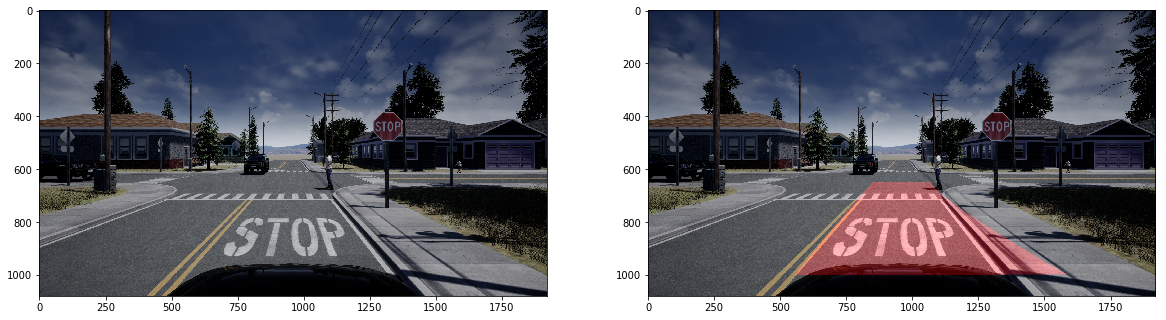

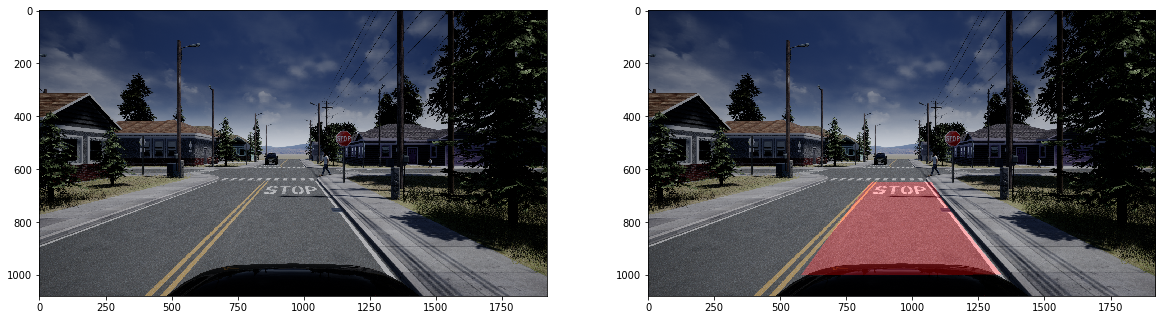

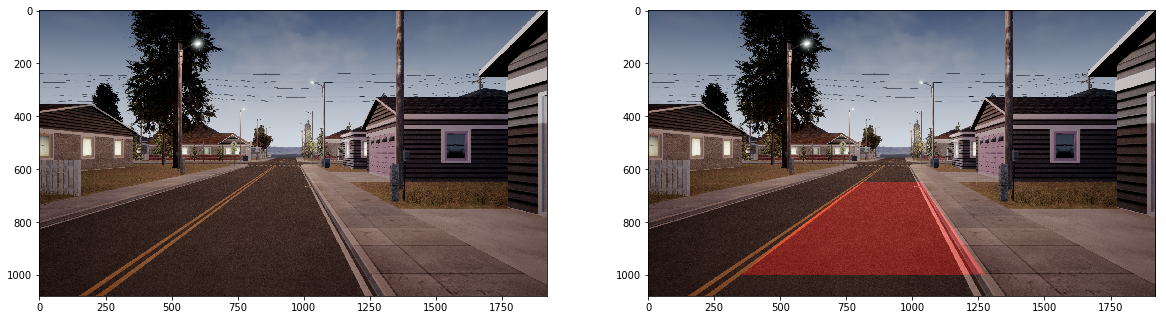

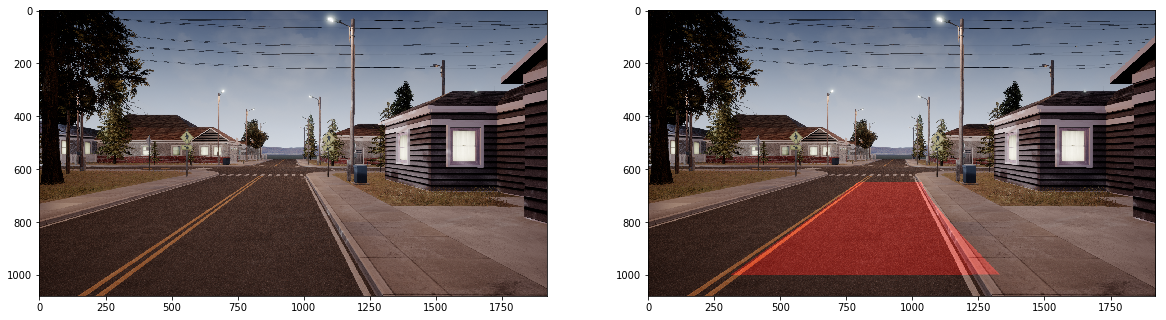

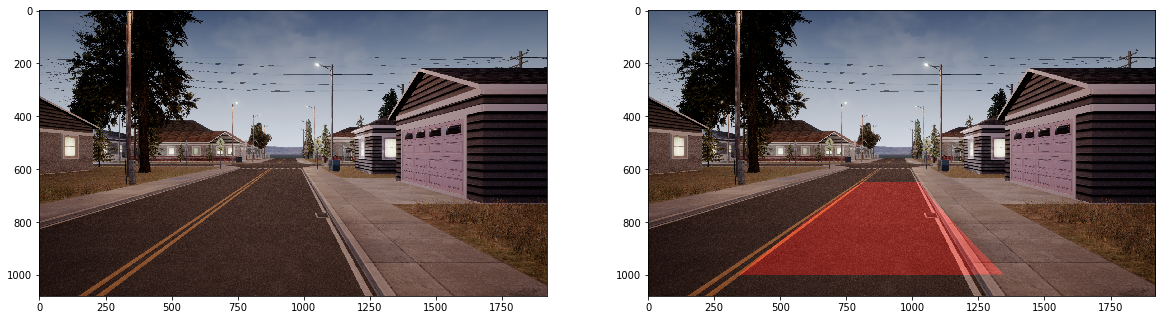

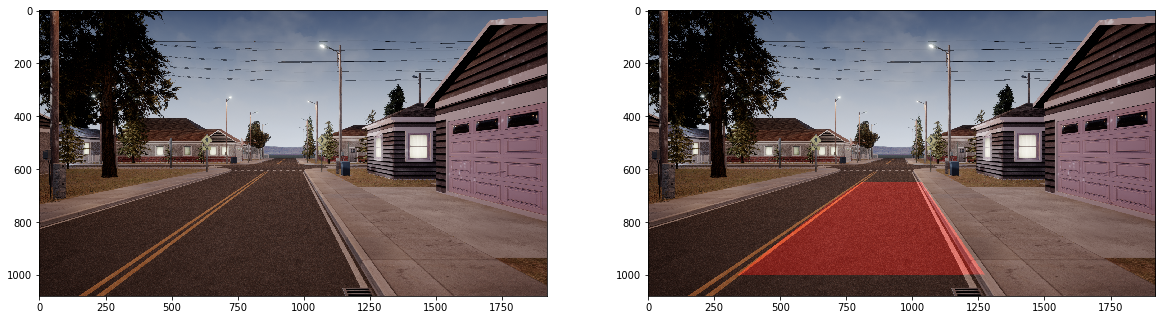

In [16]:
images = glob.glob("./RightHookTestImage/rh*.png")
for frame in images:
    img = cv2.imread(frame)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #undistortedImg = cv2.undistort(img, mtx, dist, None, mtx)
    warpedImg, M, Minv = warpImage(img)
    edgeDetectedImg = combinedEdgeDetection(warpedImg)
    #plotedLinesImg = plotWindows(edgeDetectedImg)
    leftCentroids, rightCentroids = findConvCenter(edgeDetectedImg)
    plotedLinesImg, leftX, rightX = drawPoly(img, warpedImg, leftCentroids, rightCentroids, Minv)
    
    f = plt.figure(figsize= (20,15))
    f.add_subplot(1, 2, 1)
    plt.imshow(img)
    f.add_subplot(1, 2, 2)
    plt.imshow(plotedLinesImg)
plt.show()

In [17]:
def imagePipeline(img):
    img = cv2.resize(img, (1080, 720))
    #undistortedImg = cv2.undistort(img, mtx, dist, None, mtx)
    warpedImg, M, Minv = warpImage(undistortedImg)
    edgeDetectedImg = combinedEdgeDetection(warpedImg)
    #plotedLinesImg = plotWindows(edgeDetectedImg)
    leftCentroids, rightCentroids = findConvCenter(edgeDetectedImg)
    imgOut, leftX, rightX = drawPoly(undistortedImg, warpedImg, leftCentroids, rightCentroids, Minv)
    return imgOut
    
    results = tfnet.return_predict(img)
    output_frame = boxing(imgOut, results)       
    return output_frame
print ('...')

...
